In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Path= "/content/drive/MyDrive/Advanced Statistics/SalaryData.csv"
SalaryData= pd.read_csv(Path)

In [ ]:
SalaryData.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [ ]:
SalaryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [ ]:
SalaryData.shape

(40, 3)

In [11]:
SalaryData.describe(include='all')

,Education,Occupation,Salary
count,40,40,40.000000
unique,3,4,NaN
top,Doctorate,Prof-specialty,NaN
freq,16,13,NaN
mean,NaN,NaN,162186.875000
std,NaN,NaN,64860.407506
min,NaN,NaN,50103.000000
25%,NaN,NaN,99897.500000
50%,NaN,NaN,169100.000000
75%,NaN,NaN,214440.750000


In [ ]:
SalaryData.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [ ]:
SalaryData.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [ ]:
SalaryData.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

###For conducting One way ANOVA I have to state the null hypothesis and the alternative hypothesis for both of the variables Education and Occupation present in the dataset.

###Null hypothesis for Education (H0) =  Salary is independent of education and means of salary for different categories of education are equal.
###Alternative hypothesis for Education (H1) =  Salary is not independent of education and means of salary for different categories of education  are different.

###Null hypothesis for Occupation (H0) =  Salary is independent of occupation and means of salary for different categories of occupation are equal.
###Alternative hypothesis for Occupation (H1) = Salary is not independent of occupation and means of salary for different categories of occupation are different.

In [ ]:
formula = 'Salary ~ C(Education)'
model = ols(formula, SalaryData).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


###Here in the above output I can see that the p value is less than alpha value i.e. 0.05. It means I can easily reject the null hypothesis. There is difference in mean values of salary due to different category of Education section.

In [ ]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, SalaryData).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


###In the One-way ANOVA test with respect to Occupation I can see from the above output that the p value is greater than 0.05. It means I can not reject the null hypothesis. There is no difference in mean values of salary due to different category of Occupation section.

In [ ]:
compare = MultiComparison(SalaryData['Salary'], SalaryData['Education'])
result = compare.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


###From the above output table I can see that the p- values(p-adj in the table) are lesser than the significance level 0.05 for all the three categories of education, this implies that the mean salaries across all categories of education are different. 

In [ ]:
compare = MultiComparison(SalaryData['Salary'], SalaryData['Occupation'])
result = compare.tukeyhsd()
print(result)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


###For the category occupation, the Tukey Honest Significant Difference test has further confirmed that the mean salaries across all occupation classes are significantly same. The output table confirms the same, wherein I see that all p-values are greater than 0.05. 

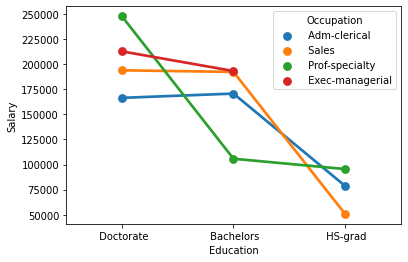

In [12]:
sns.pointplot(x='Education', y='Salary', data=SalaryData, hue='Occupation', ci=None)
plt.show()

###From the above plot I can see there are some interaction between the two treatments.

###The following are some of the observations from the interaction plot: 

*  People with Exec-managerial occupation do not have HS-grad as education. Their education categories consist of Doctorate and Bachelors only. 
*   People with education as Bachelors or Doctorate and occupation as Adm-clerical and Sales almost earn the same salaries(salaries ranging from 170000 – 190000). 
*   People with education as Bachelors and occupation as Prof-Specialty earn lesser than people with education as Bachelors and occupations as Adm-clerical and Sales. 
*   People with education as Doctorate and occupation as Prof-Specialty earn the highest among all (250000).
*   Similarly, people with education as HS-grad and occupation as Sales earn the least among all (50000). 
*   People with Bachelors or Doctorate education and Sales as occupation earn the same salaries. 
*   Adm clerical people with education as HS-grad earn the lowest salaries when compared to people with education as Bachelors or Doctorate. 

###Before performing Two-way ANOVA I will state the null hypothesis and alternative hypothesis in this case.
###Null hypothesis(H0) : The mean of 'Salary' Variable with respect to 'Education' and 'Occupation' is equal and interaction doesn't exist between Occupation and Education.
###Alternative hypothesis(H1) : At least one of the means of 'Salary' is different with to respect to 'Education' and 'Occupation'and interaction does exist between Occupation and Education 

In [ ]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, SalaryData).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


###After performing Two-way ANOVA I can see from the output table that p value for 'C(Education):C(Occupation)' is less than 0.05. It means I can reject null hypothesis here and conclude that at least one of the mean values of Salary is different with respect to Education and Occupation.

##The business implications of performing ANOVA in this case study-

###The primary purpose of performing ANOVA is to help in establishing the cause-effect relation amongst the variables. Here in this case the two independent variables are Education and Occupation and the dependent variable is Salary. At first I perform One-way ANOVA with respect to both Education and Occupation individually to check their effects on the variable Salary. From the outputs I derive that for Education there is effect on Salary but Occupation does not effect Salary individually. But Again after doing Two-way ANOVA I can conclude that there is an interaction between Education and Occupation which is effecting the variable Salary.